In [1]:
import excursion.utils as utils
from excursion import get_gp
import excursion.optimize as optimize
import numpy as np
import scipy.stats
import excursion.plotting.twodim as plots
import os
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
truth0 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.5,0.5], cov = np.diag([0.2,0.3])))
truth1 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.6,0.8], cov = np.diag([0.2,0.3])))


class scan(object):
    def __init__(self, functions):
        self.truth_functions = functions
        self.plot_rangedef = np.asarray([[0,1,101],[0,1,101]])
        self.plotG = utils.mgrid(self.plot_rangedef)
        self.plotX = utils.mesh2points(self.plotG,self.plot_rangedef[:,2])

        self.acq_rangedef = np.asarray([[0,1,21],[0,1,21]])
        self.acqG = utils.mgrid(self.acq_rangedef)
        self.acqX = utils.mesh2points(self.acqG,self.acq_rangedef[:,2])

        self.mean_rangedef = np.asarray([[0,1,21],[0,1,21]])
        self.meanG = utils.mgrid(self.mean_rangedef)
        self.meanX = utils.mesh2points(self.meanG,self.mean_rangedef[:,2])
        
        self.thresholds = [0.6]
    def invalid_region(self,X):
        return np.zeros(X.shape[0], dtype = 'bool')

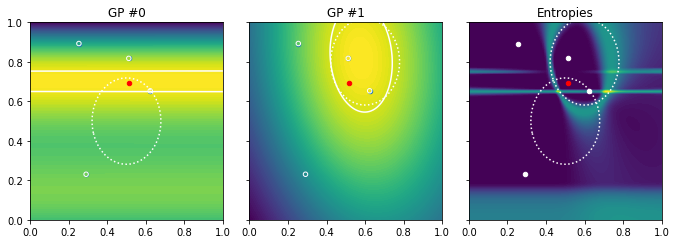

Iteration 0. new x: [[0.7 0.1]]
Iteration 0. Evaluted function 0 to values: [0.4503013]
Iteration 0. Evaluted function 1 to values: [0.28003565]


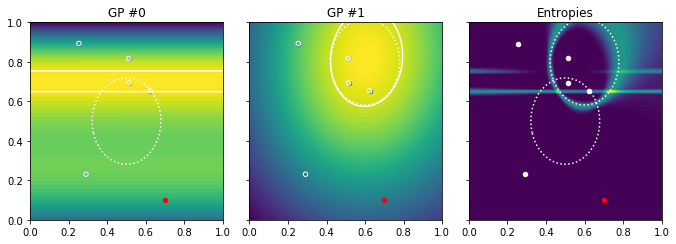

Iteration 1. new x: [[0.8  0.75]]
Iteration 1. Evaluted function 0 to values: [0.46750821]
Iteration 1. Evaluted function 1 to values: [0.58547115]


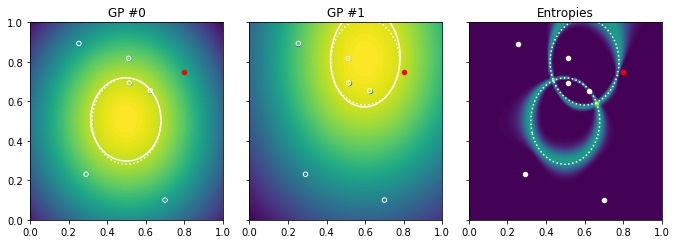

Iteration 2. new x: [[0.5  0.45]]
Iteration 2. Evaluted function 0 to values: [0.64704569]
Iteration 2. Evaluted function 1 to values: [0.51667647]


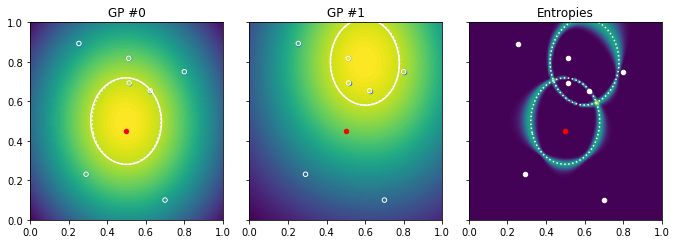

Iteration 3. new x: [[0.65 0.95]]
Iteration 3. Evaluted function 0 to values: [0.4382693]
Iteration 3. Evaluted function 1 to values: [0.62193375]


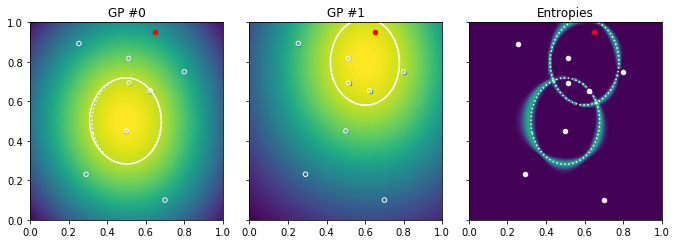

Iteration 4. new x: [[0.35 0.55]]
Iteration 4. Evaluted function 0 to values: [0.61165409]
Iteration 4. Evaluted function 1 to values: [0.50078001]


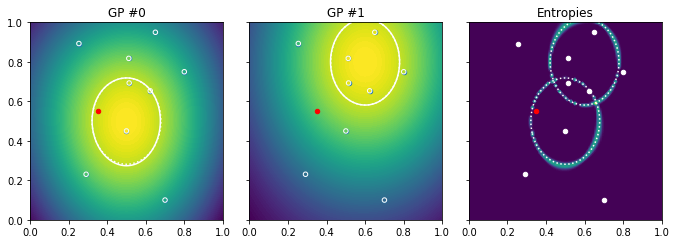

Iteration 5. new x: [[0.55 1.  ]]
Iteration 5. Evaluted function 0 to values: [0.42567107]
Iteration 5. Evaluted function 1 to values: [0.604056]


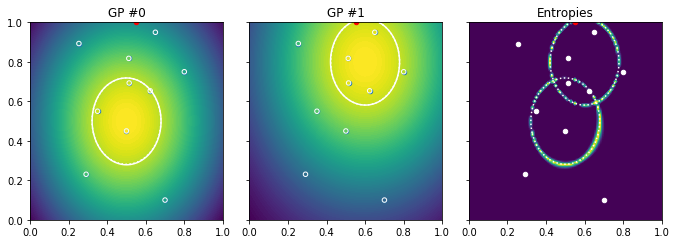

Iteration 6. new x: [[0.65 0.4 ]]
Iteration 6. Evaluted function 0 to values: [0.604056]
Iteration 6. Evaluted function 1 to values: [0.49455922]


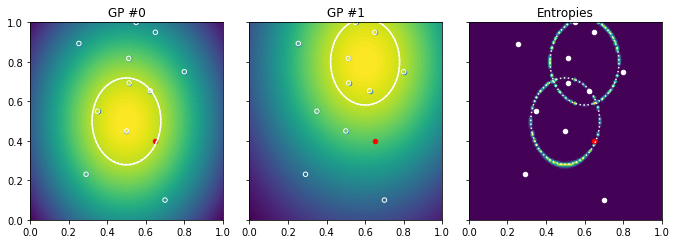

Iteration 7. new x: [[0.5 0.3]]
Iteration 7. Evaluted function 0 to values: [0.60784317]
Iteration 7. Evaluted function 1 to values: [0.41776409]


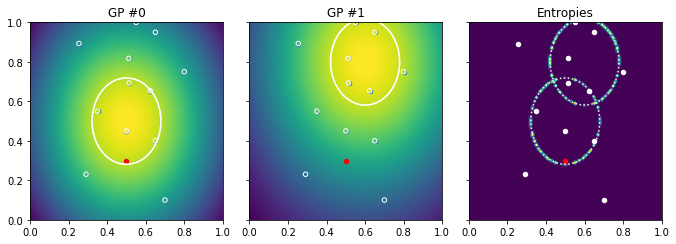

Iteration 8. new x: [[0.75 0.9 ]]
Iteration 8. Evaluted function 0 to values: [0.42567107]
Iteration 8. Evaluted function 1 to values: [0.604056]


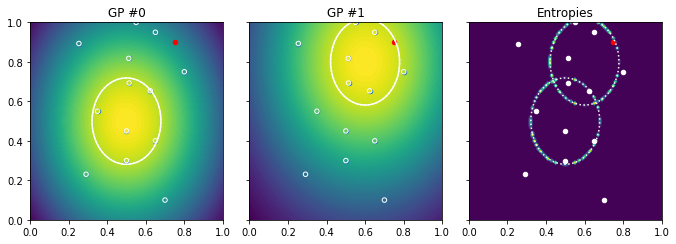

Iteration 9. new x: [[0.35 0.4 ]]
Iteration 9. Evaluted function 0 to values: [0.604056]
Iteration 9. Evaluted function 1 to values: [0.42567107]


In [3]:

scandetails = scan([truth0,truth1])
X,y_list,gps = optimize.init(scandetails)

N_UPDATES = 10

def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]

    plot_and_save(workdir, index, gps,X,y_list,scandetails)

    newx, acqvals = optimize.gridsearch(gps, X, scandetails)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [func(np.asarray([newx])) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newx])